José Luis Roberto Zárate Cortés (000183347)
### **Semana 3; Clase 3_algebra_lineal, 2_interpolacion**
### _Polyfit & Splines Cúbicos._

1.- Ejercicio:  Interpolar con 10 puntos generados de la función de Runge $f(x)=\frac{1}{1+25x^2}$ en el intervalo $[-1,1]$ equidistantes. Hacer la gráfica con $10,000$ puntos en el mismo intervalo. Utilizar polyfit para el polinomio interpolador y splines cúbicos.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from numpy import arange
import pprint

In [2]:
frunge = lambda x : 1/(1+25*x**2)
np.random.seed(1985)
# los puntos deben ser equidistantes en el intervalo [-1,1]
pts = 10
#x = arange(-1,1.01,(2/9))
x = np.linspace(-1, 1, pts)
y = frunge(x)
np.set_printoptions(precision=7)
print('Valores de X (equidistantes):')
pprint.pprint(x)
print('Valores de Y (función Runge):')
pprint.pprint(y)

Valores de X (equidistantes):
array([-1.       , -0.7777778, -0.5555556, -0.3333333, -0.1111111,
        0.1111111,  0.3333333,  0.5555556,  0.7777778,  1.       ])
Valores de Y (función Runge):
array([0.0384615, 0.0620214, 0.1147309, 0.2647059, 0.7641509, 0.7641509,
       0.2647059, 0.1147309, 0.0620214, 0.0384615])


Text(0.5, 1.0, 'Puntos ejemplo')

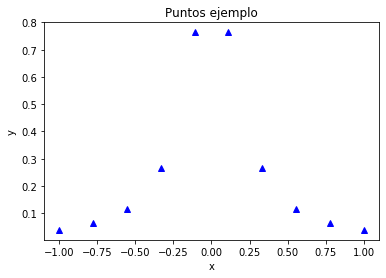

In [3]:
plt.plot(x,y, 'b^')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Puntos ejemplo')

In [4]:
grafpts = 10000 # número de Puntos a graficar en ambos modelos
xgraf = np.linspace(min(x),max(x), grafpts)

# Polyfit

coefpol = np.polyfit(x,y,pts-1)
np.set_printoptions(precision = 3)
#np.set_printoptions(suppress=False)
pprint.pprint(coefpol)
ygrafpol = np.polyval(coefpol,xgraf)

array([ 1.506e-13,  2.162e+01, -2.896e-13, -4.492e+01,  1.665e-13,
        3.073e+01, -2.582e-14, -8.261e+00,  0.000e+00,  8.615e-01])


El polinomio de interpolación para la función de runge en [-1,1] con 10 pts equidistantes es:
$$ P_{10pts}(x) = (1.506^{-13})x^9 + 21.62x^8 + (-2.896^{-13})x^7 + -44.92x^6 + (1.665^{-13})x^5 + 30.73x^4 + (-2.582^{-14})x^3 + -8.261 x^2 + .8615 $$

In [5]:
# Cubic Splines

pw_sp = interp1d(x, y, kind = 'cubic') #spline piecewise
ygrafcs = pw_sp(xgraf)

In [6]:
# Función Runge

yfrunge = frunge(xgraf)

**_GRÁFICAS DE FUNCIÓN RUNGE CON 10 PTOS, INTERPOLADA CON POLINOMIOS Y SPLINES CUBICOS_**

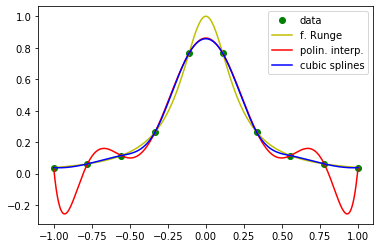

In [7]:
plt.plot(x, y, 'go',xgraf, yfrunge, 'y-',xgraf, ygrafpol, 'r-',xgraf, ygrafcs, 'b-')
plt.legend(['data','f. Runge','polin. interp.','cubic splines'], loc='best')